<h1> Week 2 Homework

<h2>Question 3.1</h2>
Using the same data set (credit_card_data.txt or credit_card_data-headers.txt) as in Question 2.2, use the ksvm or kknn function to find a good classifier:

a) using cross-validation (do this for the k-nearest-neighbors model; SVM is optional); and

b) splitting the data into training, validation, and test data sets (pick either KNN or SVM; the other
is optional).

<h3>Answer Part a)</h3>
using cross-validation for the k-nearest-neighbors model

In [1]:
# loading the dataset
# READ DATASET as Matrix
data_df <- as.data.frame(read.table("credit_card_data-headers.txt", header = TRUE, sep = "\t"))
# Display Data
head(data_df)

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


<p><p style="page-break-after:always;"></p></p>

In [2]:
# Fix Seed number to ensure same random selection effects
set.seed(1)
# create train and test data set
N <- nrow(data_df)
test_percentage <- 0.2
random_test_indx <- sample(1 : N, size = round(test_percentage*N,0), replace = F)
# Define Training and testing data frames
testing_df <- data_df[random_test_indx,]
training_df <- data_df[-random_test_indx,]

In [3]:
# load required libraries
options(warn=-1) # used to suppress warnings
library(ggplot2)
library(kknn)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [4]:
# Vector to store accuracy
Accuracy <- seq(2,50,1)
# Vector to store K list
k_list <- seq(2,50,1)
# loop through different K values
for (j in 1:49)
{
# building the model with cv.kknn function with K-fold cross validation = 10
KNN_model <- cv.kknn(formula=R1~., data=training_df, kcv=10, k=j, scale=TRUE)
# analyzing the results
result <- as.data.frame(KNN_model[1])
result[,"yhat"] <-round(result[,"yhat"],0)
Accuracy[j] <- sum(result[,"yhat"]==result[,"y"])/nrow(result)
}
knn_cv_df <- data.frame(k_list, Accuracy)

<p><p style="page-break-after:always;"></p></p>

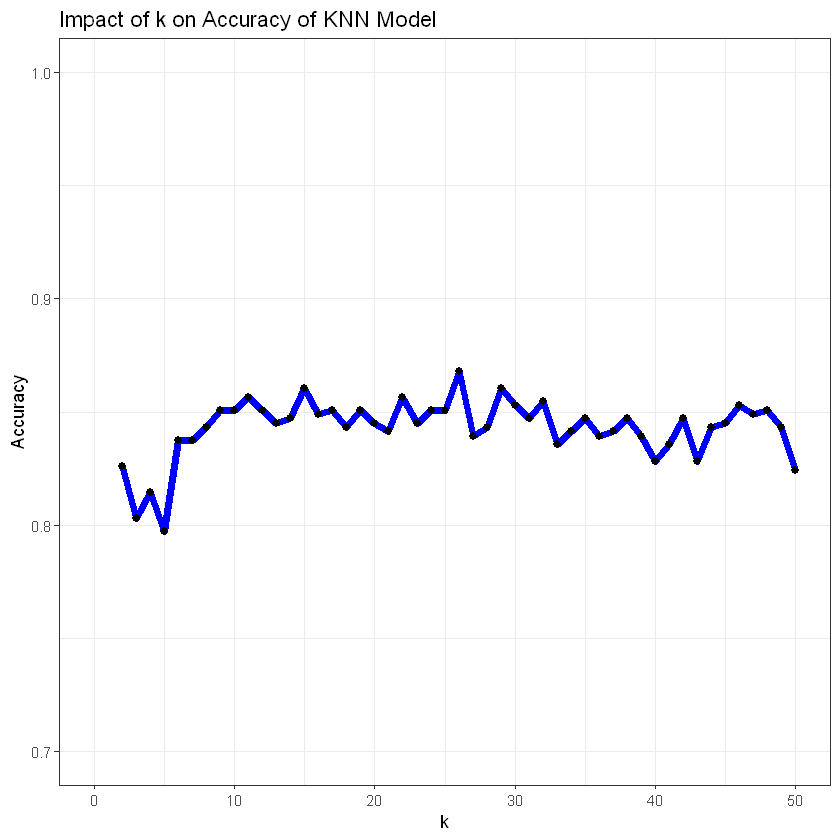

In [5]:
# plot the results
knn_plot <-  ggplot(knn_cv_df, aes(x=k_list, y=Accuracy)) +
  geom_line(size=2, color="blue")+
  geom_point(size=2, color="black")+
  ggtitle("Impact of k on Accuracy of KNN Model")+
  labs(x="k", Y="Accuracy")+
  ylim(0.7, 1)+
  xlim(0, 50)+
  theme_bw()
knn_plot

From the Plot, It appears all cases with k >= 7 has relatively the same Accuracy +/- 85% with possible slight decline at fairly high k values. 

<p><p style="page-break-after:always;"></p></p>

In [6]:
# Define Best K and its Accuracy
best_k <- knn_cv_df[which.max(knn_cv_df[,"Accuracy"]),"k_list"]
best_k
best_k_CV_Accuracy <- knn_cv_df[which.max(knn_cv_df[,"Accuracy"]),"Accuracy"]
round(best_k_CV_Accuracy,4)

[1] 26

[1] 0.8681

In [7]:
# Build the best model for Validation
Final_model <- train.kknn(formula=R1~., data=training_df, ks=best_k, scale=TRUE)
# Predict results of the testing data set
predict_test <- predict(Final_model, testing_df[,1:10])
CV_Accuracy <- sum(round(predict_test, 0)==testing_df[,11])/nrow(testing_df)
round(CV_Accuracy,4)

[1] 0.8244

<b> Conclusions </b>

Based on the results, The optimum k value is 26 based on Cross validation (Accuracy = 86.8%) however testing showed the model Accuracy to be 82.4%.
The reduction in model accuracy on testing indicates the presence of Random effects 

<p><p style="page-break-after:always;"></p></p>

<h3>Answer Part b)</h3>
splitting the data into training, validation, and test data sets for the k-nearest-neighbors model

In [8]:
# Fix Seed number to ensure same random selection effects
set.seed(0)
# Number of data points in Data Frame
N <- nrow(data_df)
# list of all indeces
idx <- seq(1, N)
# Defining percentage of validation and test
# for consistency, Testing data farme will remain constant in both parts (a & b) 
# but training dataframe in part a will be split into training and validation
# testing set to 20% while training set from Exercise 1b split into validation 20% and the remaining 60% for training
validation_fraction <- 0.20
# remaining index for training and validation
remaining_idx <- idx[! (idx %in% random_test_indx)]
# define validation index
validation_idx <- sample(remaining_idx, size = round(validation_fraction*N,0), replace = F)
# define training index
training_idx <- remaining_idx[! (remaining_idx %in% validation_idx)]

In [9]:
# Create Data Frame for each data set
training_df <- data_df[training_idx,]
validation_df <- data_df[validation_idx,]

In [10]:
# load required library
#install.packages("kknn")
options(warn=-1) # used to suppress warnings
library(kknn)

In [11]:
# Vector to store accuracy
Accuracy <- seq(2,50,1)
# Vector to store K list
k_list <- seq(2,50,1)
# loop through different K values
for (j in 1:49)
{
    KNN_model <- train.kknn(formula=R1~., data=training_df, ks=j, scale=TRUE)
    predict_test <- predict(KNN_model, validation_df[,1:10])
    Accuracy[j] <- sum(round(predict_test, 0)==validation_df[,11])/nrow(validation_df)
}
# store results in a Dataframe
knn_df <- data.frame(k_list, Accuracy)

<p><p style="page-break-after:always;"></p></p>

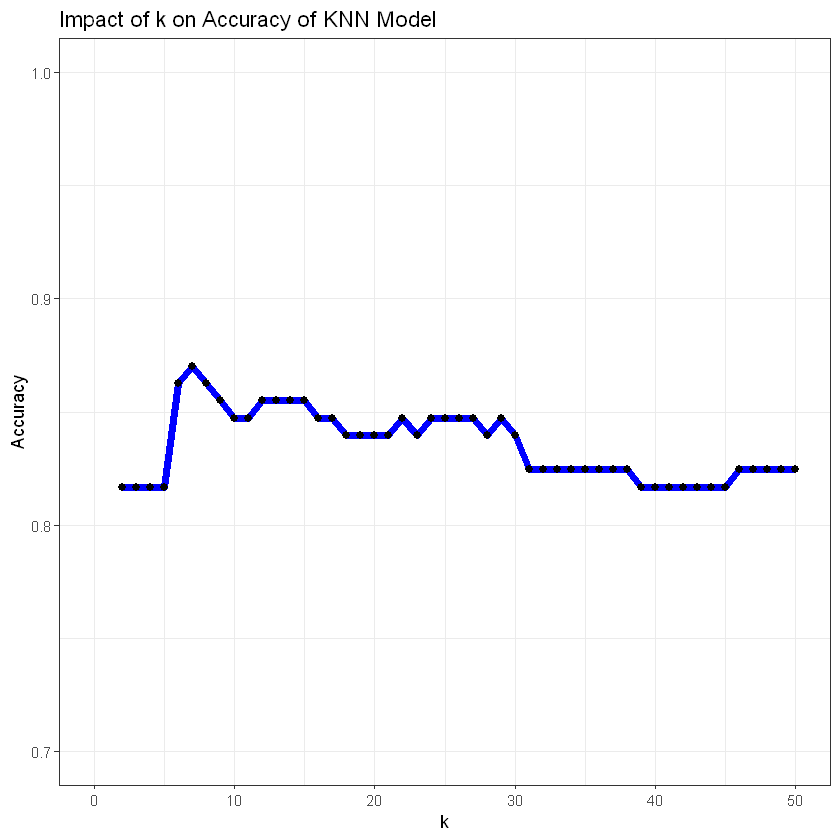

In [12]:
# Plot the impact of k value on Accuracy
knn_plot <-  ggplot(knn_df, aes(x=k_list, y=Accuracy)) +
  geom_line(size=2, color="blue")+
  geom_point(size=2, color="black")+
  ggtitle("Impact of k on Accuracy of KNN Model")+
  labs(x="k", Y="Accuracy")+
  ylim(0.7, 1)+
  xlim(0, 50)+
  theme_bw()
knn_plot

Similar to the Cross-Validation plot, This plot shows all cases with k >= 6 has relatively the same Accuracy +/- 85% with possible slight decline at fairly high k values. 

<p><p style="page-break-after:always;"></p></p> 

In [13]:
# Define Best K and its Accuracy
best_k <- knn_df[which.max(knn_df[,"Accuracy"]),"k_list"]
best_k
best_k_CV_Accuracy <- knn_df[which.max(knn_df[,"Accuracy"]),"Accuracy"]
round(best_k_CV_Accuracy,4)

[1] 7

[1] 0.8702

In [14]:
# Build the best model for Validation
Final_model <- train.kknn(formula=R1~., data=training_df, ks=best_k, scale=TRUE)
# Predict results of the testing data set
predict_test <- predict(Final_model, testing_df[,1:10])
Accuracy <- sum(round(predict_test, 0)==testing_df[,11])/nrow(testing_df)
round(Accuracy,4)

[1] 0.8168

<b> Conclusions </b>

Based on the results of the training, validation and testing split, The optimum k value is 7 based on validation (Accuracy = 87.0%) however testing showed the model Accuracy to be 81.7%.

The reduction in model accuracy on testing indicates the presence of Random effects.

On the other hand, both models (training, validation and testing split and cross validation) shows the same testing accuracy of around 82% (82.4 vs 81.7%) indicating that both technique although reached different k optimal number, created a model that has the same testing accuracy.

This is aligned with the graphs showing small difference in Accuracy at k >= 7.

<p><p style="page-break-after:always;"></p></p>

<h2>Question 4.1</h2>

Describe a situation or problem from your job, everyday life, current events, etc., for which a clustering
model would be appropriate. List some (up to 5) predictors that you might use.

<b> Answer </b>

In Petroleum Engineering, clustering can be used to identify groups of hydrocarbon producing wells that are similar to each other.
Possible predictors:
1. Reservoir rock quality intersected by the well
2. Type of Hydrocarbon fluid (e.g. Oil or Gas and its properties)
3. Producing formation and it's properties (e.g. Depth, General regional understanding, etc.)
4. Drive Mehcnism responsible for reservoir pressure maintainance.

This can help in better predicting the performance of new wells, forecast the performance of existing wells, identify over/under performing wells for further investigation or intervention, etc.

<p><p style="page-break-after:always;"></p></p>

<h2>Question 4.2</h2>

The iris data set iris.txt contains 150 data points, each with four predictor variables and one categorical response. The predictors are the width and length of the sepal and petal of flowers and the response is the type of flower. The data is available from the R library datasets and can be accessed with iris once the library is loaded. It is also available at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Iris ). The response values are only given to see how well a specific method performed and should not be used to build the model.

Use the R function kmeans to cluster the points as well as possible.
Report the best combination of predictors, your suggested value of k, and how well your best clustering predicts flower type

<h3>Answer 4.2</h3>

In [15]:
# loading the dataset
# READ DATASET as Matrix
iris <- as.data.frame(read.table("iris.txt", header = FALSE, sep = ","))
colnames(iris) <- c("sepal_length", "sepal_width", "petal_length", "petal_width", "class")
# Display Data
head(iris)
nrow(iris)

sepal_length,sepal_width,petal_length,petal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


[1] 150

<p><p style="page-break-after:always;"></p></p>

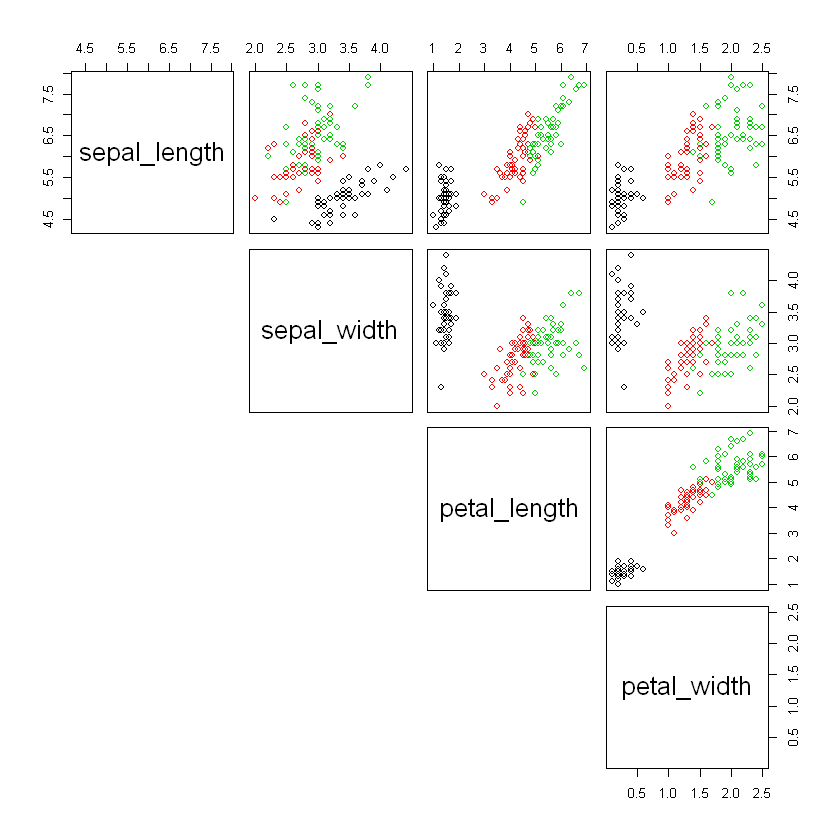

In [16]:
# visual inspection by pairs plot
pairs(iris[1:4], col = iris$class, lower.panel=NULL)

Visual inspection of the data shows that there are a few pairs (e.g. petal length and petal width, sepal width and petal width, etc.) are able to groups the different classes effectively within distinct clusters. Other pairs (e.g. sepal length sepal width) has a lower correlation with the classes and two classes (red and green) has no clear distinction between their cluster boundary.

<p><p style="page-break-after:always;"></p></p>

In [17]:
# scaling the data
iris_df <- iris
iris_df[,1:4] = scale(iris_df[,1:4])

In [18]:
# fix Seed number
set.seed(1)
# Vector of k define the optimum number of k points
k_list <- seq(1,25)
# vector to store sum withins results
sum_withins <- seq(1,25)
# Building kmeans model
for (i in k_list){
    kmeans_model <- kmeans(iris_df[,1:4], centers=i)
    # flatten the withins list and get the within-cluster sum of squares distance value
    withins <- unlist(kmeans_model$tot.withinss, recursive = TRUE, use.names = FALSE)
    sum_withins[i] <- withins[1]
}
# convert results to dataframe
kmeans_results <- data.frame(k_list, sum_withins)

<p><p style="page-break-after:always;"></p></p>

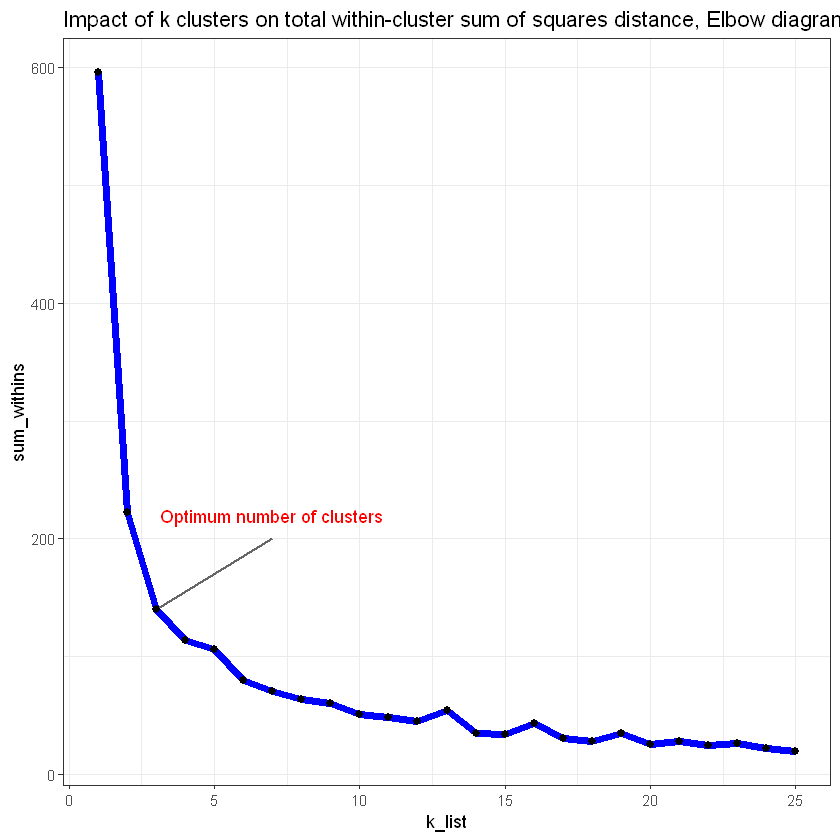

In [19]:
# Plot the impact of k value on total within-cluster sum of squares distance
kmeans_plot <-  ggplot(kmeans_results, aes(x=k_list, y=sum_withins)) +
  geom_line(size=2, color="blue")+
  geom_point(size=2, color="black")+
  ggtitle("Impact of k clusters on total within-cluster sum of squares distance, Elbow diagram")+
  annotate("segment", x = 3, xend = 7, y = 140, yend = 200, colour = "black", size=0.75, alpha=0.6)+
  annotate("text", x = 7, y = 220, label = "Optimum number of clusters", color="red")+
  theme_bw()
kmeans_plot

<p><p style="page-break-after:always;"></p></p>

In [20]:
# find unique number of classes in dataset
length(unique(iris_df[,5]))

[1] 3

Given that the optimum number of clusters from Elbow diagram agrees with the actual clusters is a good indicator of data quality.

In [21]:
# fix Seed number
set.seed(1)
# Building the model
kmeans_model <- kmeans(iris_df[,1:4], centers=3)
# Model results
kmeans_results <- kmeans_model$cluster

In [22]:
# create mode function
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
# mapping kmeans results to class column in data frame
class_1 <- getmode(kmeans_model$cluster[1:50])
class_2 <- getmode(kmeans_model$cluster[50:100])
class_3 <- getmode(kmeans_model$cluster[100:150])
# convert factors in data frame to numeric factors 
mapping <- c("setosa"=class_1,"versicolor"=class_2,"virginica"=class_3)
iris_df["Class_Factor"] <- mapping[iris_df[,5]]

In [23]:
# Find model accuracy
Accuracy <- sum(iris_df["Class_Factor"]==kmeans_results)/nrow(iris_df)
print("K-means model Accuracy")
round(Accuracy,4)

[1] "K-means model Accuracy"


[1] 0.8333

<b> Conclusions </b>

Based on testing the Base Model (created by all 4 predictors) aganist the true classes, the model has an accuracy of 83.3% with 3 clusters

<p><p style="page-break-after:always;"></p></p>

<b> Tetsing different column combinations </b>

The main assumption is we can not judge by Model accuracy since in clustering the Response is typically is not known otherwise classification techniques would be more suitable.

Two Metrics will be used to evaluate the clustering technique using different input predictors:
1. Total within-cluster Sum of Squares (WSS means the sum of distances between the points and the corresponding centroids for each cluster). The better model has the smallest within cluster sum of squares (points are closest to their cluster centroid)
2. The between-cluster Sum of Squares (BSS means the squared average distance between all centroids). The better model has the largest between cluster centroids sum of squares (the centroids are most further apart, i.e. more distinct)

Reference: 
https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/

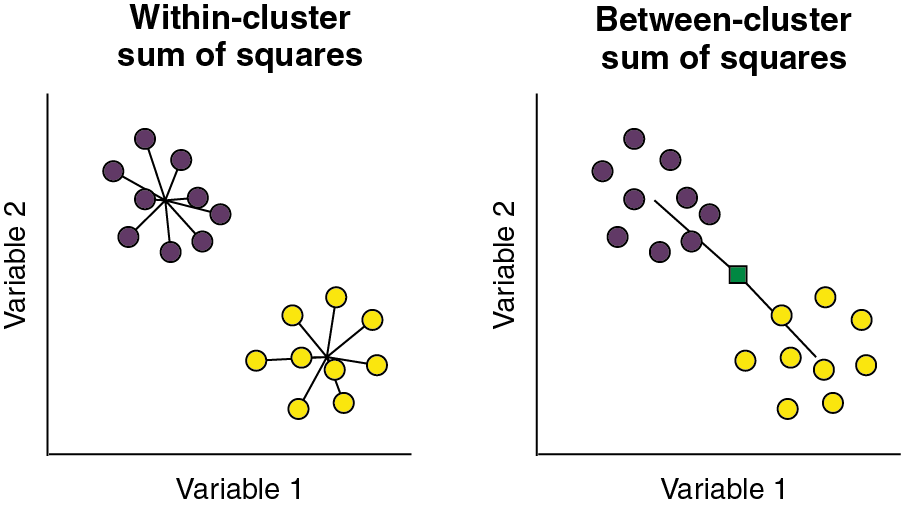

<p><p style="page-break-after:always;"></p></p>

In [24]:
# Total within-cluster sum of squares
round(kmeans_model$tot.withinss,0)
# The between-cluster sum of squares
round(kmeans_model$betweenss,0)

model_name <- "Base Model(4 Cols)"
cols_compare_df <- data.frame(Model=model_name, 
                              WSS=round(kmeans_model$tot.withinss,0), BSS=round(kmeans_model$betweenss,0))
cols_compare_df

[1] 140

[1] 456

Model,WSS,BSS
Base Model(4 Cols),140,456


In [25]:
# creating 3 columns combinations
# fix Seed number
set.seed(1)
# testing the different permutations of the predictors
#install.packages("gtools")
library(gtools)
# creating 3 columns combinations
comb_data <- as.data.frame(combinations(n = 4, r = 3, v = 1:4, repeats.allowed = FALSE))
# loop through all combinations
for (i in 1:nrow(comb_data)){
    # Building the model
    model_data <- iris_df[,c(comb_data[i,1],comb_data[i,2],comb_data[i,3])]
    iter_kmeans_model <- kmeans(model_data, centers=3)
    # adding the data to a dataframe
    model_name <- paste(colnames(model_data), collapse = ' / ')
    data <- c(model_name, round(iter_kmeans_model$tot.withinss,0), round(iter_kmeans_model$betweenss,0))
    new_df <- data.frame("Model"=(data[1]), "WSS"=data[2], "BSS"=data[3])
    cols_compare_df <- rbind(cols_compare_df, new_df)
}

In [26]:
# creating 2 columns combinations
comb_data <- as.data.frame(combinations(n = 4, r = 2, v = 1:4, repeats.allowed = FALSE))
# loop through all combinations
for (i in 1:nrow(comb_data)){
    # Building the model
    model_data <- iris_df[,c(comb_data[i,1],comb_data[i,2])]
    # Building the model
    model_name <- paste(colnames(model_data), collapse = '&')
    iter_kmeans_model <- kmeans(model_data, centers=3)
    # adding the data to a dataframe
    model_name <- paste(colnames(model_data), collapse = ' / ')
    data <- c(model_name, round(iter_kmeans_model$tot.withinss,0), round(iter_kmeans_model$betweenss,0))
    new_df <- data.frame("Model"=(data[1]), "WSS"=data[2], "BSS"=data[3])
    cols_compare_df <- rbind(cols_compare_df, new_df)
}

<p><p style="page-break-after:always;"></p></p>

In [27]:
cols_compare_df[order(as.numeric(cols_compare_df$BSS), decreasing =TRUE),]

,Model,WSS,BSS
1,Base Model(4 Cols),140,456
4,sepal_length / petal_length / petal_width,63,384
5,sepal_width / petal_length / petal_width,96,351
2,sepal_length / sepal_width / petal_length,120,327
3,sepal_length / sepal_width / petal_width,126,321
11,petal_length / petal_width,18,280
7,sepal_length / petal_length,43,255
8,sepal_length / petal_width,51,247
9,sepal_width / petal_length,76,222
10,sepal_width / petal_width,80,218


Judging by the Sensitivty analysis dataframe above (sorted by BSS descending)
1. The 4 predictors model (Base Model) although has the highest BSS but also has the lowest WSS
2. The binary model (petal_length / petal_width, index 11 above) has a lower BSS than base model but has the lowest value of WSS (BSS=280 and WSS=18)

Qualitatively, this model should have better results than the base model

<b> Testing the binary model using petal_length and petal_width predictors only </b>

1. ensuring elbow diagram shows 3 as optimum k number otherwise change it.
2. measuing the accuracy aganist actual classes
3. Since its a binary model, its easy to visualize using an XY plot for visual quality check

In [28]:
# fix Seed number
set.seed(1)
# Vector of k define the optimum number of k points
k_list <- seq(1,25)
# vector to store sum withins results
sum_withins <- seq(1,25)
# Building kmeans model
for (i in k_list){
    kmeans_model <- kmeans(iris_df[,c("petal_length", "petal_width")], centers=i)
    # flatten the withins list and get the within-cluster sum of squares distance value
    withins <- unlist(kmeans_model$tot.withinss, recursive = TRUE, use.names = FALSE)
    sum_withins[i] <- withins[1]
}
# convert results to dataframe
kmeans_results <- data.frame(k_list, sum_withins)

<p><p style="page-break-after:always;"></p></p>

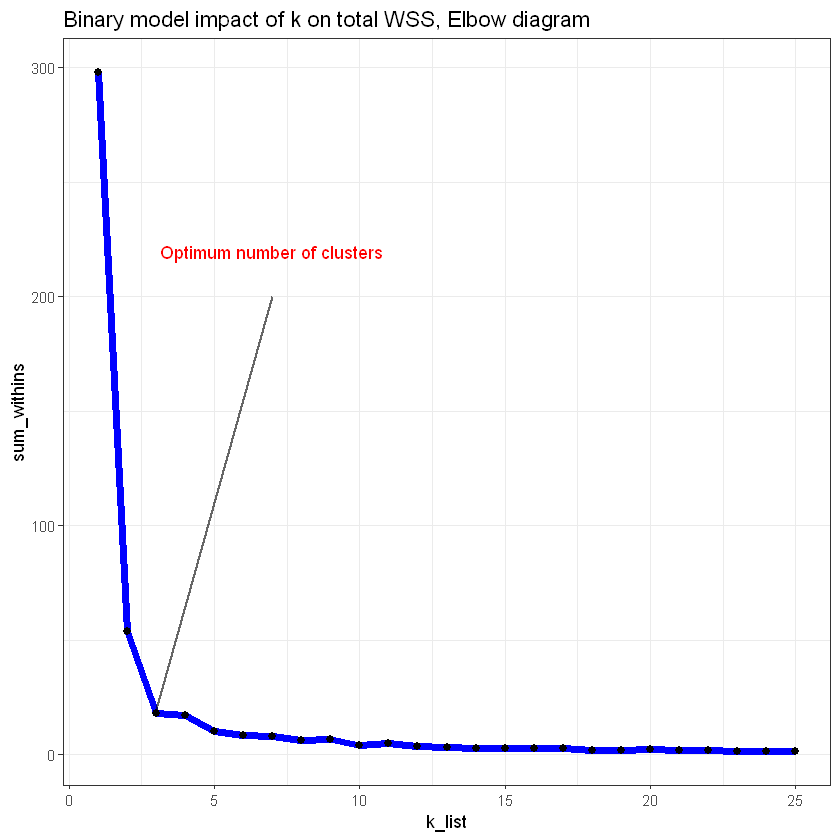

In [29]:
# Plot the impact of k value on total within-cluster sum of squares distance
kmeans_plot <-  ggplot(kmeans_results, aes(x=k_list, y=sum_withins)) +
  geom_line(size=2, color="blue")+
  geom_point(size=2, color="black")+
  ggtitle("Binary model impact of k on total WSS, Elbow diagram")+
  annotate("segment", x = 3, xend = 7, y = 20, yend = 200, colour = "black", size=0.75, alpha=0.6)+
  annotate("text", x = 7, y = 220, label = "Optimum number of clusters", color="red")+
  theme_bw()
kmeans_plot

<p><p style="page-break-after:always;"></p></p>

In [30]:
# fix Seed number
set.seed(1)
# Building the model
kmeans_model <- kmeans(iris_df[,c("petal_length", "petal_width")], centers=3)
# Model results
kmeans_results <- kmeans_model$cluster
# mapping kmeans results to class column in data frame
class_1 <- getmode(kmeans_model$cluster[1:50])
class_2 <- getmode(kmeans_model$cluster[50:100])
class_3 <- getmode(kmeans_model$cluster[100:150])
# convert factors in data frame to numeric factors 
mapping <- c("setosa"=class_1,"versicolor"=class_2,"virginica"=class_3)
iris_df["Class_Factor"] <- mapping[iris_df[,5]]
# Find model accuracy
Accuracy <- sum(iris_df["Class_Factor"]==kmeans_results)/nrow(iris_df)
print("K-means model Accuracy")
round(Accuracy,4)

[1] "K-means model Accuracy"


[1] 0.96

<p><p style="page-break-after:always;"></p></p>

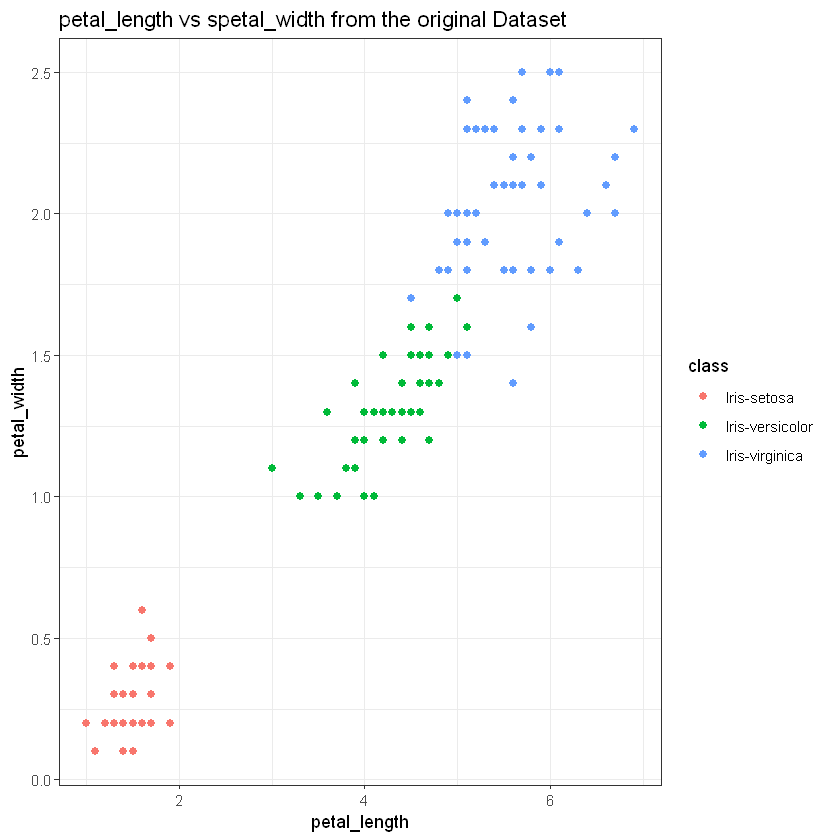

In [31]:
# Plot the impact of k value on total within-cluster sum of squares distance
kmeans_plot <-  ggplot(iris, aes(x=petal_length, y=petal_width, color=class)) +
  geom_point(size=2)+
  ggtitle("petal_length vs spetal_width from the original Dataset")+
  theme_bw()
kmeans_plot

The Graph clearly shows three distinct clusters with good grouping and boundaries.

<b> Final Conclusions </b>

1. The two predictors used for the model are: petal length and petal width
2. The model's optimum number of clusters driven from elbow diagram is 3 clusters (aligned with actual classes)
3. The model's testing accuracy is 96%